# A gentle inroduction to PyTorch


In [2]:
# Create a tensor (tensor =  array like data structure in pytorch)
import torch
import numpy as np

ndarray = np.array([0, 1, 2])
t = torch.from_numpy(ndarray)
print(t)

tensor([0, 1, 2], dtype=torch.int32)


In [3]:
print(t.shape)
print(t.dtype)
print(t.device)

torch.Size([3])
torch.int32
cpu


In [5]:
t = torch.tensor([0, 1, 2])
print(t)

tensor([0, 1, 2])


In [6]:
ndarray = np.array([[0, 1, 2], [3, 4, 5]])
t = torch.from_numpy(ndarray)
print(t)

tensor([[0, 1, 2],
        [3, 4, 5]], dtype=torch.int32)


In [8]:
new_t = torch.rand_like(t, dtype = torch.float)
print(new_t)

tensor([[0.9960, 0.6922, 0.0010],
        [0.1994, 0.2069, 0.4023]])


In [9]:
# tensor with wanted shape
my_shape = (3, 3)
rand_t = torch.rand(my_shape)
print(rand_t)

tensor([[0.0857, 0.8884, 0.5954],
        [0.0090, 0.9916, 0.8918],
        [0.3451, 0.0107, 0.6426]])


Tensor operations

In [10]:
zeros_tensor = torch.zeros((2,3))
print(zeros_tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [12]:
print(zeros_tensor[1])
print(zeros_tensor[:,0])

tensor([0., 0., 0.])
tensor([0., 0.])


In [13]:
transposed = zeros_tensor.T
print(transposed)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [15]:
ones_tensor = torch.ones(3,3)
product = torch.matmul(zeros_tensor, ones_tensor)
print(product)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [16]:
# load data
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

data_tr = datasets.MNIST(root="./datasets/MNIST", train=True, download=True, transform=ToTensor())

data_ts = datasets.MNIST(root="./datasets/MNIST", train=False, download=True, transform=ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 15958391.53it/s]


Extracting ./datasets/MNIST\MNIST\raw\train-images-idx3-ubyte.gz to ./datasets/MNIST\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 2465866.54it/s]

Extracting ./datasets/MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to ./datasets/MNIST\MNIST\raw




100%|██████████| 1648877/1648877 [00:00<00:00, 9767325.27it/s]


Extracting ./datasets/MNIST\MNIST\raw\t10k-images-idx3-ubyte.gz to ./datasets/MNIST\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4397628.99it/s]

Extracting ./datasets/MNIST\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./datasets/MNIST\MNIST\raw



In [17]:
data_tr[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

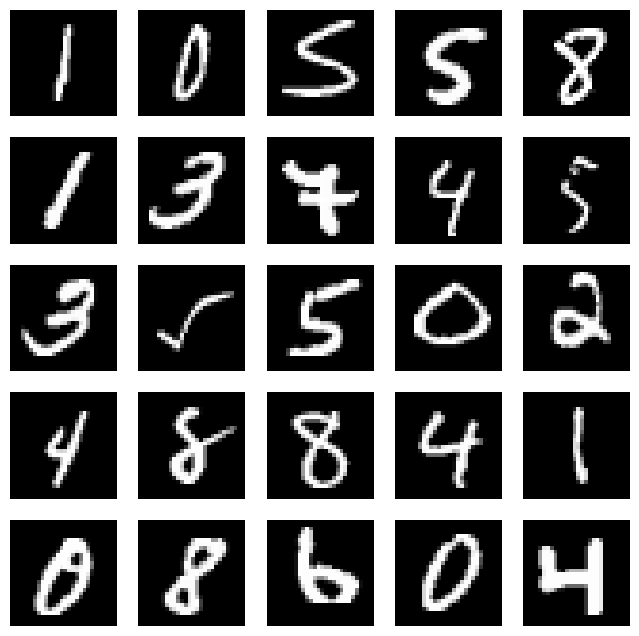

In [20]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data_tr), size=(1,)).item()
    img, label = data_tr[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

In [22]:
data_tr.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [23]:
from torch.utils.data import DataLoader

loaded_train = DataLoader(data_tr, batch_size=64, shuffle=True)
loaded_test = DataLoader(data_ts, batch_size=64, shuffle=True)

In [26]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten() # Responsoble for transofrimg the data from multidimensional to one dimension only
        self.linear_relu_stack = nn.Sequential( # creates a sequence of layers inside the network
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [27]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [28]:
# Loss function
loss_function = nn.CrossEntropyLoss()

In [29]:
# Optimization algorithm
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [30]:
# Train function
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 1000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [31]:
# Test function
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [33]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(loaded_train, model, loss_function, optimizer)
    test(loaded_test, model, loss_function)
print("Done!")

Epoch 1
-------------------------------
loss: 2.190743  [    0/60000]
Test Error: 
 Accuracy: 65.0%, Avg loss: 2.085753 

Epoch 2
-------------------------------
loss: 2.075799  [    0/60000]
Test Error: 
 Accuracy: 69.4%, Avg loss: 1.902770 

Epoch 3
-------------------------------
loss: 1.923243  [    0/60000]
Test Error: 
 Accuracy: 72.5%, Avg loss: 1.624396 

Epoch 4
-------------------------------
loss: 1.597026  [    0/60000]
Test Error: 
 Accuracy: 76.2%, Avg loss: 1.296634 

Epoch 5
-------------------------------
loss: 1.340027  [    0/60000]
Test Error: 
 Accuracy: 79.7%, Avg loss: 1.025880 

Epoch 6
-------------------------------
loss: 1.097761  [    0/60000]
Test Error: 
 Accuracy: 81.7%, Avg loss: 0.843572 

Epoch 7
-------------------------------
loss: 0.800321  [    0/60000]
Test Error: 
 Accuracy: 83.0%, Avg loss: 0.725901 

Epoch 8
-------------------------------
loss: 0.719926  [    0/60000]
Test Error: 
 Accuracy: 84.3%, Avg loss: 0.643709 

Epoch 9
----------------